In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('.\\Documents\\train_csv.csv')
train.time = pd.to_datetime(train.time,infer_datetime_format=True)
indexed_data = train.set_index(['time'])
indexed_data = indexed_data.drop('id',axis=1)

In [3]:
from datetime import datetime
indexed_data.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


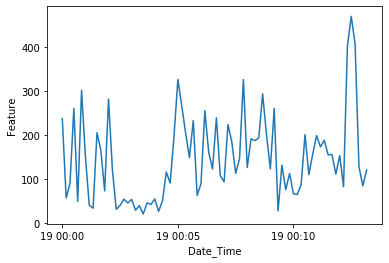

In [4]:
plt.xlabel('Date_Time')
plt.ylabel('Feature')
plt.plot(indexed_data)

In [5]:
rolmean = indexed_data.rolling(window=6).mean()
rolstd = indexed_data.rolling(window=6).std()

In [6]:
rolmean

,feature
time,
2019-03-19 00:00:00,NaN
2019-03-19 00:00:10,NaN
2019-03-19 00:00:20,NaN
2019-03-19 00:00:30,NaN
2019-03-19 00:00:40,NaN
...,...
2019-03-19 00:12:30,229.476667
2019-03-19 00:12:40,271.198333
2019-03-19 00:12:50,274.031667


In [7]:
rolstd

,feature
time,
2019-03-19 00:00:00,NaN
2019-03-19 00:00:10,NaN
2019-03-19 00:00:20,NaN
2019-03-19 00:00:30,NaN
2019-03-19 00:00:40,NaN
...,...
2019-03-19 00:12:30,163.381057
2019-03-19 00:12:40,172.702778
2019-03-19 00:12:50,169.679862


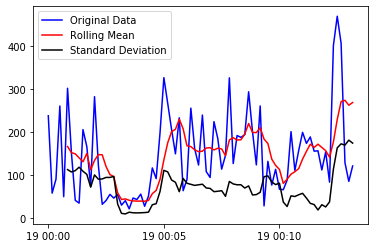

In [8]:
org = plt.plot(indexed_data, color='blue' , label='Original Data')
mean = plt.plot(rolmean, color='red' , label='Rolling Mean')
std = plt.plot(rolstd, color='black' , label='Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
dtest = adfuller(indexed_data.feature, autolag='AIC')


In [11]:
dtest

(-5.945866499650217,
 2.205049473411678e-07,
 0,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 786.8263144737514)

In [12]:
log_indexed = np.log(indexed_data)

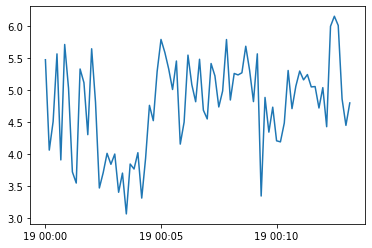

In [13]:
plt.plot(log_indexed )

In [14]:
rolmean1 = log_indexed.rolling(window=6).mean()
rolstd1 = log_indexed.rolling(window=6).std()

In [15]:
rolmean1

,feature
time,
2019-03-19 00:00:00,NaN
2019-03-19 00:00:10,NaN
2019-03-19 00:00:20,NaN
2019-03-19 00:00:30,NaN
2019-03-19 00:00:40,NaN
...,...
2019-03-19 00:12:30,5.229747
2019-03-19 00:12:40,5.388996
2019-03-19 00:12:50,5.412566


In [16]:
rolstd

,feature
time,
2019-03-19 00:00:00,NaN
2019-03-19 00:00:10,NaN
2019-03-19 00:00:20,NaN
2019-03-19 00:00:30,NaN
2019-03-19 00:00:40,NaN
...,...
2019-03-19 00:12:30,163.381057
2019-03-19 00:12:40,172.702778
2019-03-19 00:12:50,169.679862


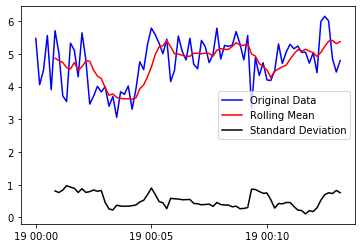

In [17]:
org1 = plt.plot(log_indexed, color='blue' , label='Original Data')
mean1 = plt.plot(rolmean1, color='red' , label='Rolling Mean')
std1 = plt.plot(rolstd1, color='black' , label='Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

In [18]:
movingAverage = np.mean(log_indexed)
movingAverage

feature    4.760676
dtype: float64

In [25]:
#pip install pmdarima 
  
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(log_indexed['feature'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=165.212, BIC=176.310, Fit time=1.878 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=203.271, BIC=207.710, Fit time=0.052 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=170.607, BIC=179.485, Fit time=0.430 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=169.742, BIC=178.620, Fit time=0.423 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=166.666, BIC=179.983, Fit time=0.726 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=184.026, BIC=192.904, Fit time=0.226 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=166.783, BIC=180.100, Fit time=2.023 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=168.485, BIC=184.022, Fit time=2.760 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=167.100, BIC=180.417, Fit time=0.733 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 -77.606
Date:                            Tue, 16 Jun 2020   AIC                            165.212
Time:                                    12:16:24   BIC                            176.310
Sample:                                         0   HQIC                           169.610
                                             - 80                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0175      0.031      0.571      0.568      -0.043       0.078
ar.L1          0.8054      0.161      4.993      0.000       0.489       1.122
ma.L1         -0.4986      0.206     -2.416      0.016      -0.903      -0.094
ma.S.L12      -0.7126      0.229     -3.112      0.002      -1.161      -0.264
sigma2         0.5060      0.130      3.890      0.000       0.251       0.761
===================================================================================
Ljung-Box (Q):                       37.19   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.60   Prob(JB):                         0.63
Heteroskedasticity (H):               0.45   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
test = pd.read_csv('.\\Documents\\test_csv.csv')

In [38]:
test.time = pd.to_datetime(test.time,infer_datetime_format=True)
test1 = test.set_index(['time'])
test1 = test1.drop('id',axis=1)

In [39]:
test1.head()

""
time
2019-03-19 00:13:20
2019-03-19 00:13:30
2019-03-19 00:13:40
2019-03-19 00:13:50
2019-03-19 00:14:00


In [40]:
train = log_indexed
test = test1 # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['feature'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            feature   No. Observations:                   80
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -79.053
Date:                            Tue, 16 Jun 2020   AIC                            168.106
Time:                                    21:27:39   BIC                            179.129
Sample:                                03-19-2019   HQIC                           172.468
                                     - 03-19-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6037      0.104     -5.813      0.000      -0.807      -0.400
ar.S.L12       0.0919      0.726      0.127      0.899      -1.331       1.515
ar.S.L24       0.2379      0.525      0.453      0.651      -0.791       1.267
ma.S.L12      -0.8389      0.962     -0.872      0.383      -2.724       1.046
sigma2         0.5401      0.194      2.789      0.005       0.161       0.920
===================================================================================
Ljung-Box (Q):                       32.79   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.78   Prob(JB):                         0.38
Heteroskedasticity (H):               0.51   Skew:                            -0.26
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

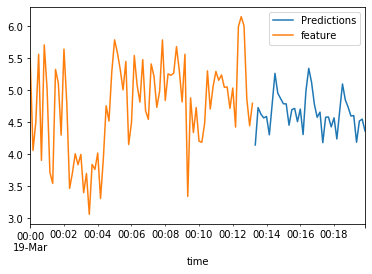

In [44]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end,typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
log_indexed['feature'].plot(legend = True) 